# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [19]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## explot data if there is NaN in dataset

In [21]:
print(data.isnull().sum())


transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64


In [22]:
# Separate features and labels
X, y = data[['transaction_date','house_age', 'transit_distance','local_convenience_stores','latitude','longitude']].values, data['price_per_unit'].values


In [23]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=166)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 331 rows
Test Set: 83 rows


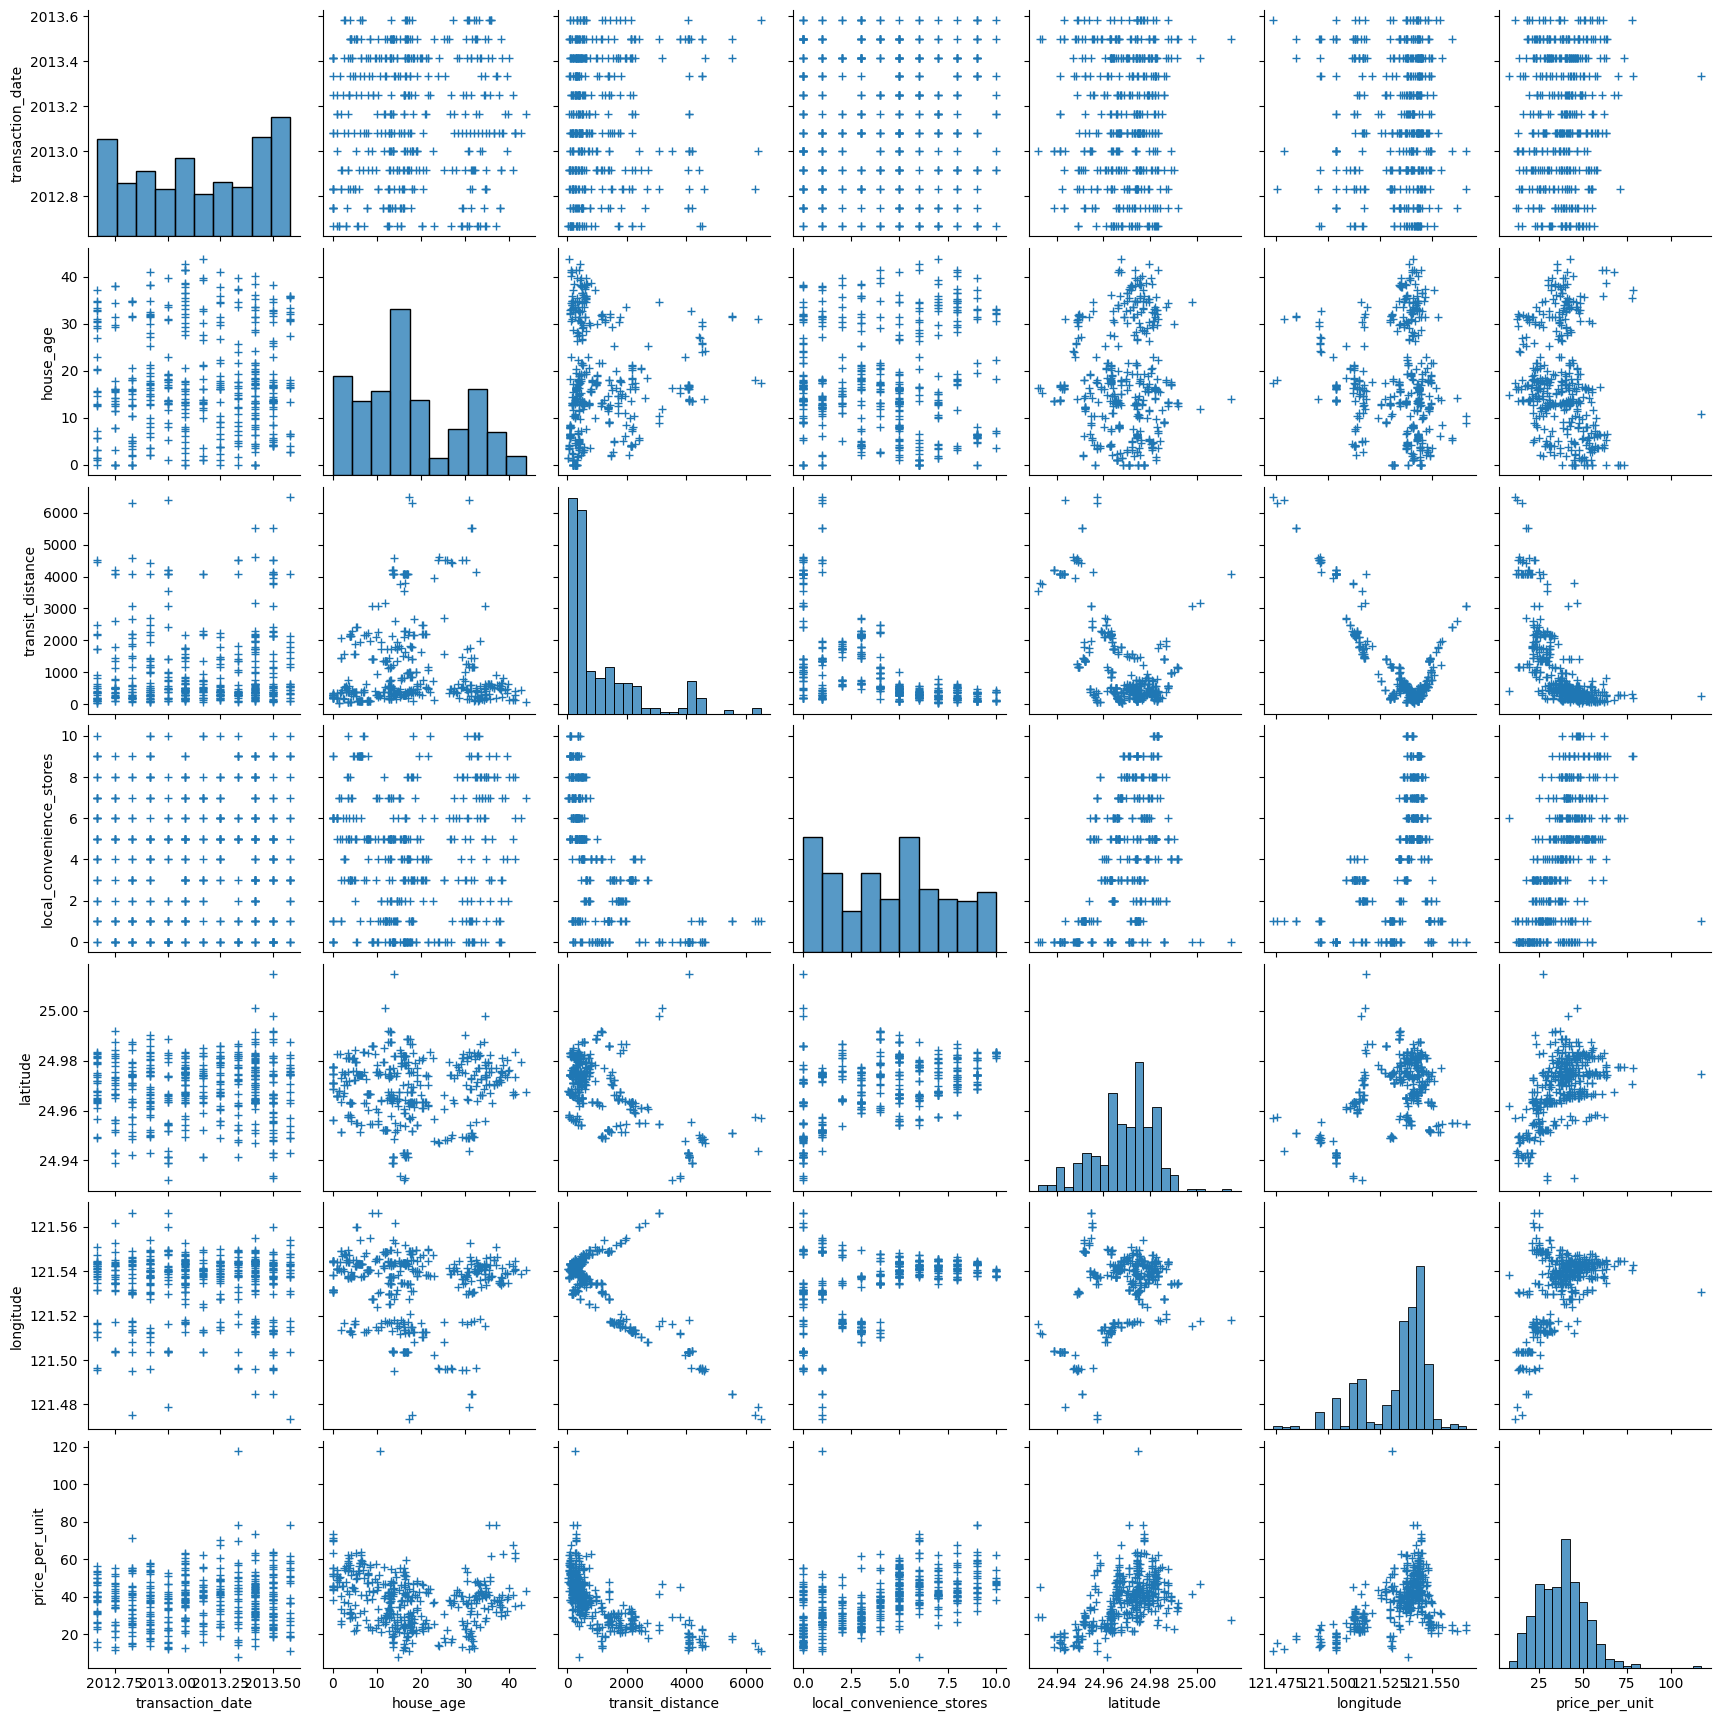

In [24]:
import seaborn as sns
numeric_features = ['transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']


sns.pairplot(data[numeric_features + ['price_per_unit']], plot_kws=dict(marker="+", linewidth=1))

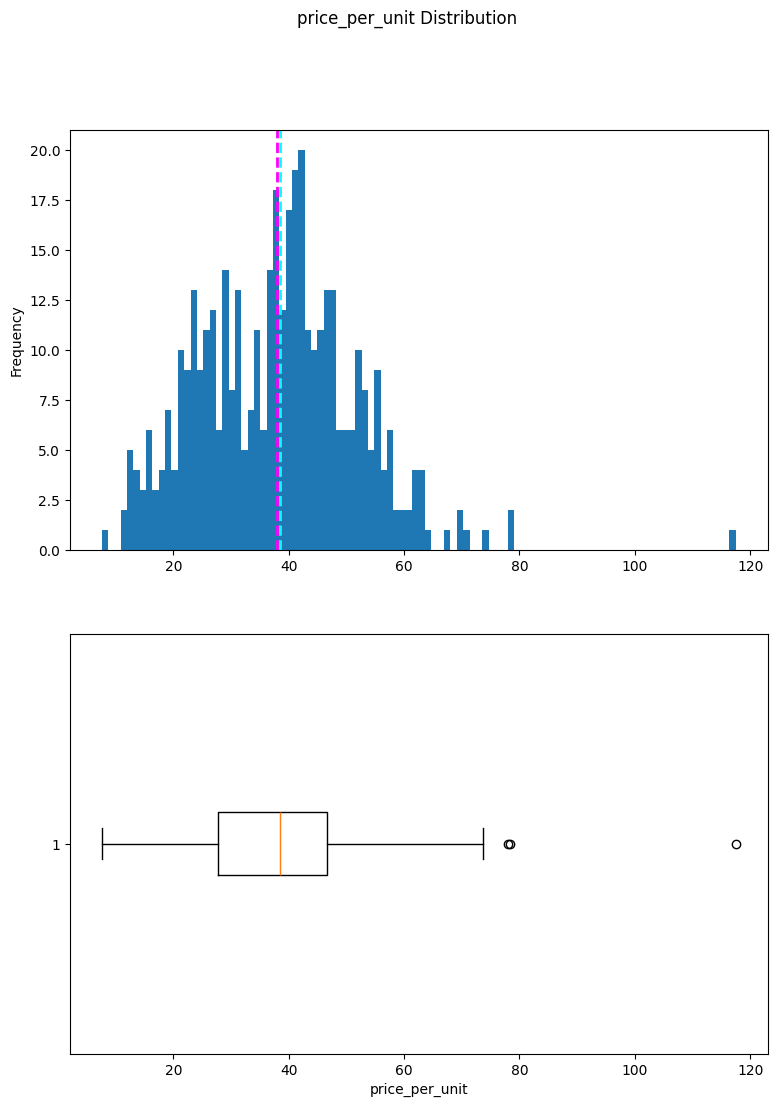

In [25]:
# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price_per_unit')

# Add a title to the Figure
fig.suptitle('price_per_unit Distribution')

# Show the figure
plt.show()

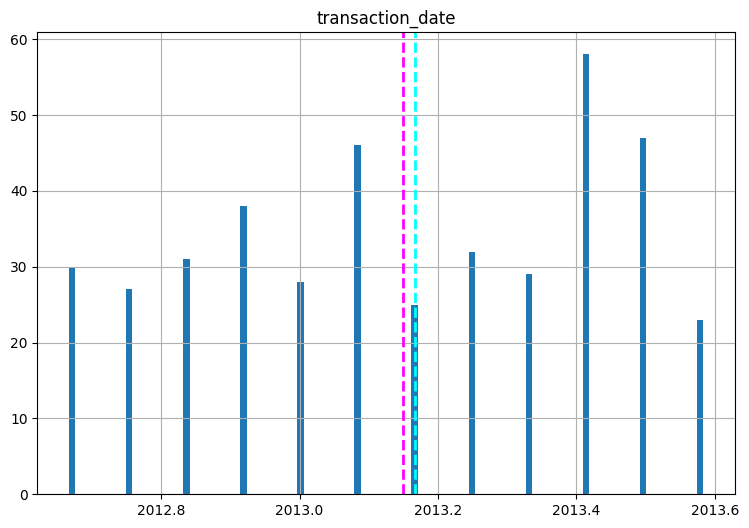

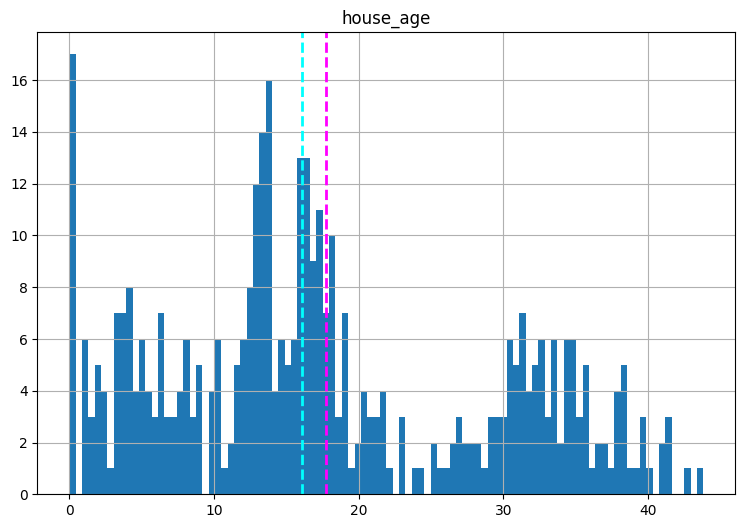

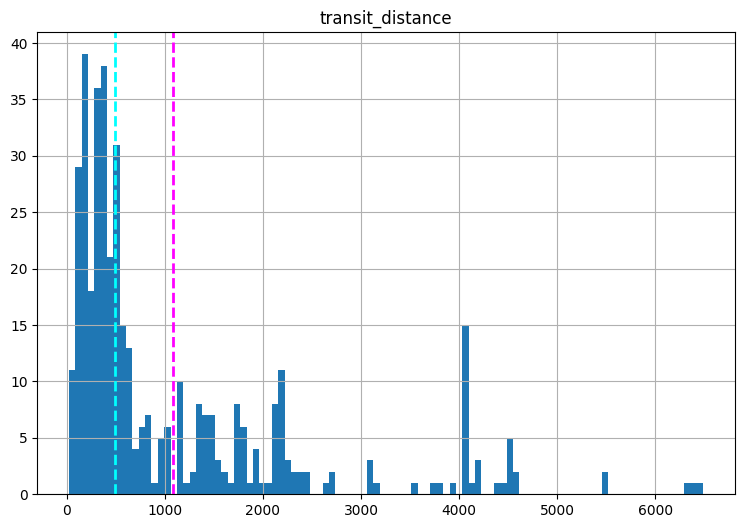

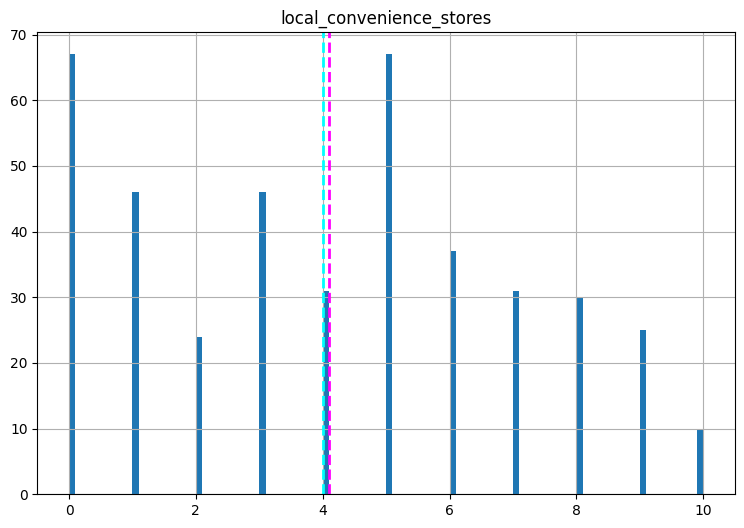

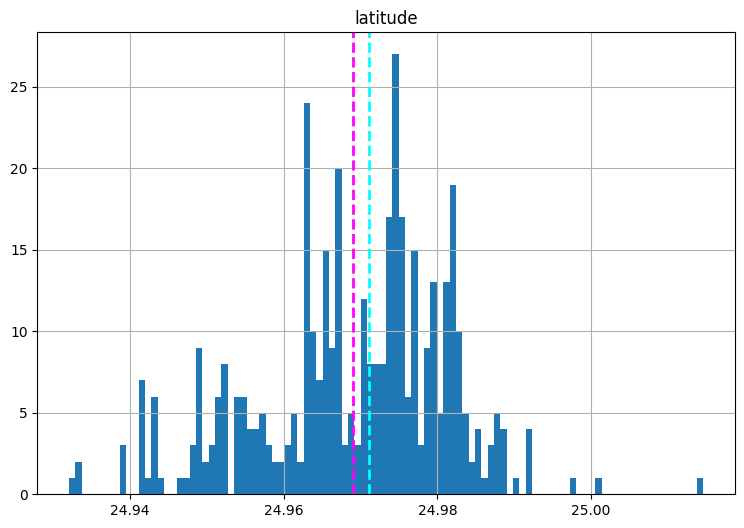

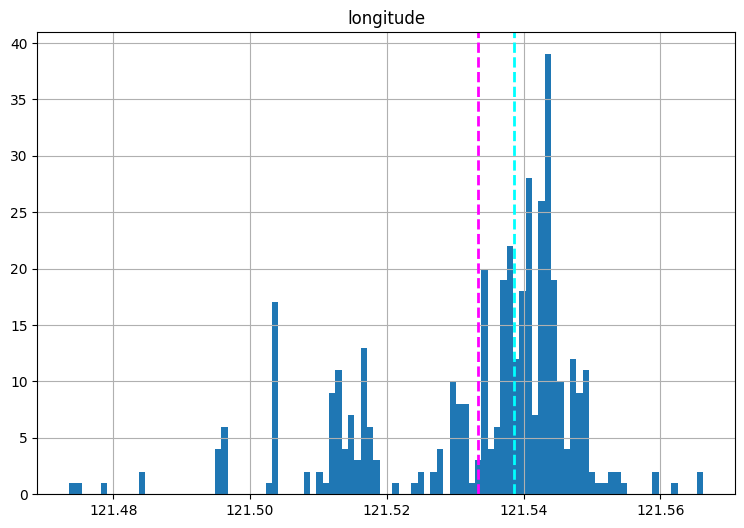

pandas.core.series.Series

In [26]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


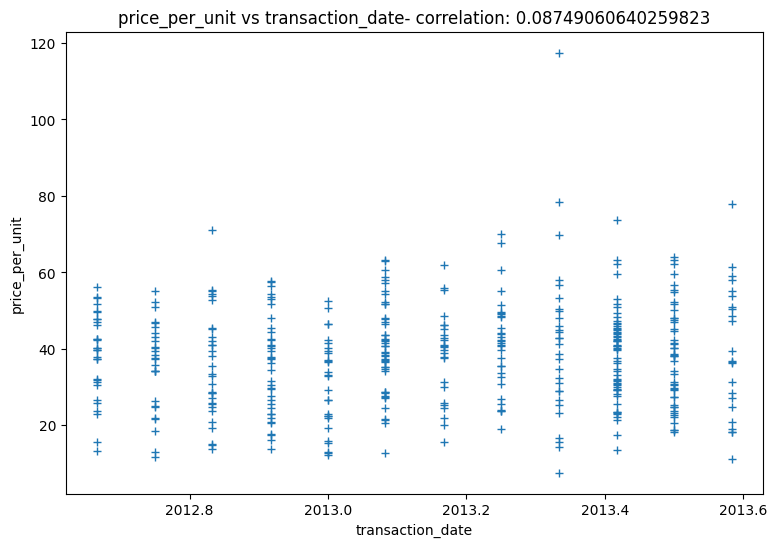

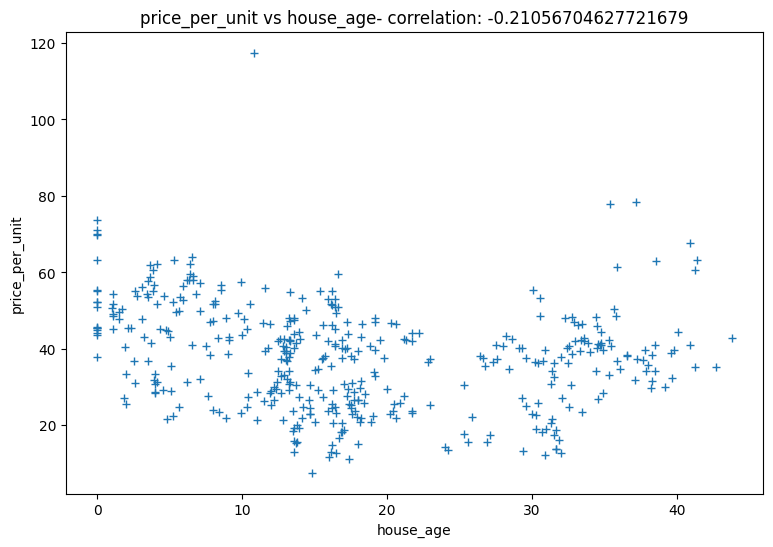

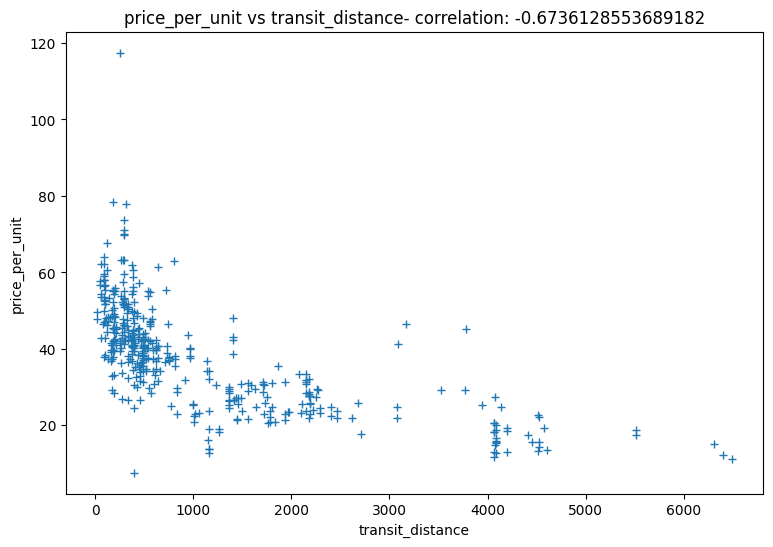

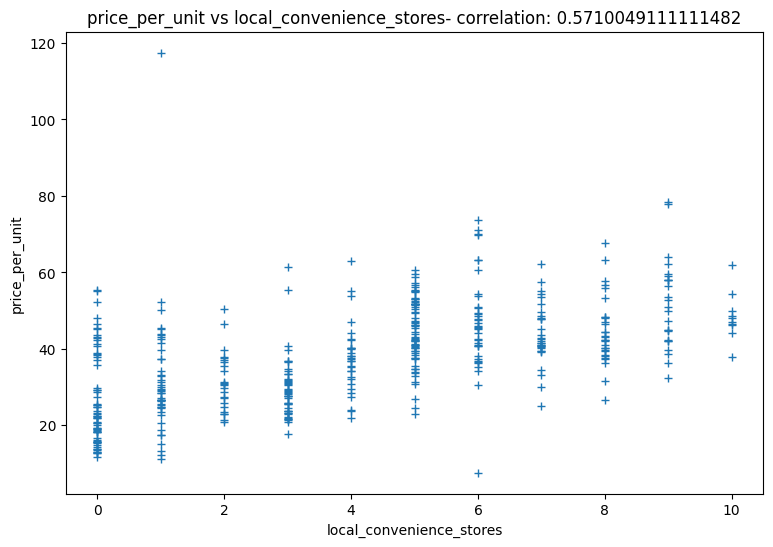

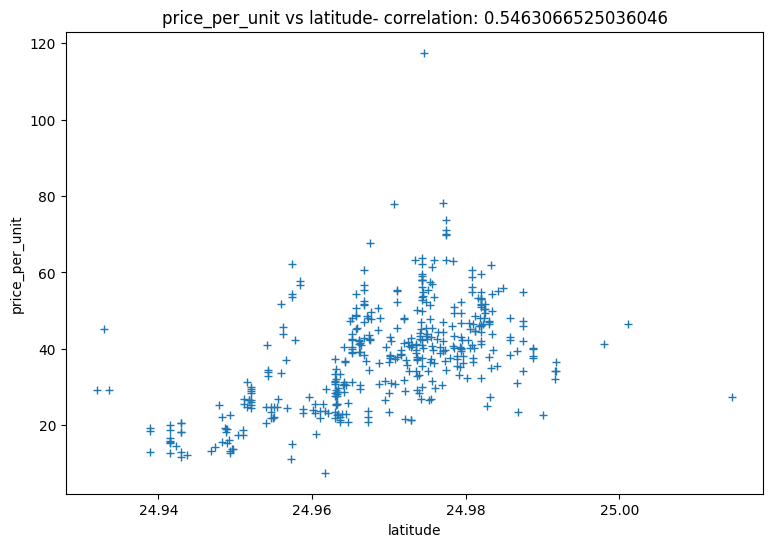

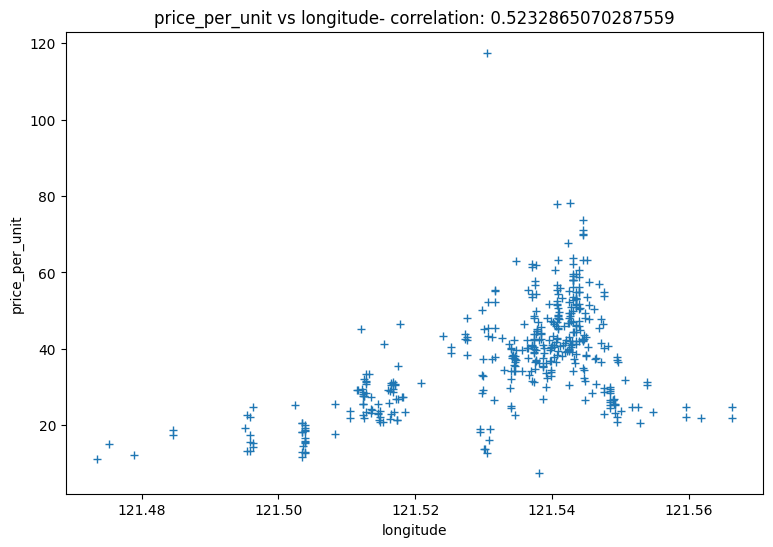

In [27]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label,marker="+",linewidths=1)
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()

## Training Model


In [28]:
# Separate features and labels
X, y = data[['transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']].values, data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01
  1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [29]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 331 rows
Test Set: 83 rows


In [30]:
# one hot encoding fro local_convenience_stores
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Define preprocessing for numeric columns (scale them)
numeric_features = [1,2,4,5]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,3]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline

# To see the preprocessor result
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# model = pipeline.fit_transform(X_train)
# print(model)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=50,random_state=100))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))





## Optimize Hyperparameters 
## great search + pipline 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import make_scorer, r2_score

# ------- for single model mutiple parameter -----
# Try these hyperparameter values
params = {
# 'regressor__learning_rate': [0.1, 0.5, 1.0],  # not for RandomForestRegressor 
 'regressor__n_estimators' : [50, 150, 75, 175]   # regressor__ is for the training model name in pipline + "__" is MUST for the hyperparameter
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(pipeline, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
# ------- for single model End -----


# ------- for mutiple model mutiple parameter -----
# Hyperparameters for different models
param_grid = [
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [None, 10, 20]
    },
    {
        'regressor': [LinearRegression()],  # No specific hyperparameters for LinearRegression
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]  # Regularization strength
    }
]

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(pipeline, param_grid, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

# ------- for mutiple model End -----

#print("Best model:", gridsearch.best_estimator_, "\n")
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
#print(model, "\n")


Best parameter combination: {'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__n_estimators': 50} 



MSE: 49.67415645933065
RMSE: 7.0479895331456515
R2: 0.7140216537531332


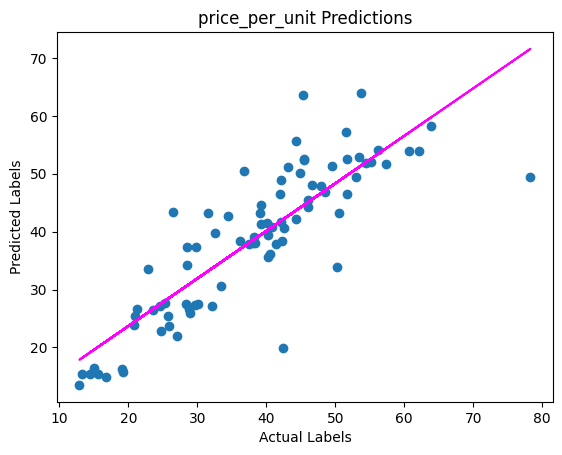

In [32]:
## Your code to use the trained model

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('price_per_unit Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Save model file

In [33]:
import joblib
model_file = '02 - model_file.pkl'

# binary model file
joblib.dump(model, model_file) 

['02 - model_file.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

## Your code to use the trained model

In [34]:
# delete model
del model

In [35]:
# Load the model from the file
loaded_model = joblib.load(model_file)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[2012.917,32,84.87882,10,24.98298,121.54024],
[2012.917,19.5,306.5947,9,24.98034,121.53951],
[2013.583,13.3,561.9845,5,24.98746,121.54391],
[2013.500,13.3,561.9845,5,24.98746,121.54391],
[2012.833,5,390.5684,5,24.97937,121.54245],
[2012.667,7.1,2175.03,3,24.96305,121.51254]])
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)

print('Prediction: {:.0f} price_per_unit'.format(np.round(result[0])))

result


New sample: [np.float64(2012.917), np.float64(32.0), np.float64(84.87882), np.float64(10.0), np.float64(24.98298), np.float64(121.54024)]
Prediction: 43 price_per_unit


array([42.69      , 48.984     , 46.226     , 49.665     , 51.17666667,
       27.224     ])